In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import fastf1
from fastf1 import plotting
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
from scipy.interpolate import interp1d


In [2]:
year = 2023
grand_prix = 'Monaco'
session_type = 'Qualifying'

In [3]:
session = fastf1.get_session(year, grand_prix, session_type)
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\chaud\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           

In [4]:
driver_1 = 'VER'
driver_2 = 'ALO'

In [5]:
laps_driver1 = session.laps.pick_drivers(driver_1)
fastest_lap_driver1 = laps_driver1.pick_fastest()
telemetry_driver1 = fastest_lap_driver1.get_telemetry()

In [6]:
laps_driver2 = session.laps.pick_drivers(driver_2)
fastest_lap_driver2 = laps_driver2.pick_fastest()
telemetry_driver2 = fastest_lap_driver2.get_telemetry()

In [7]:
corner_distances = [
    (200, "T1: Sainte Devote"),
    (420, "T2: Beau Rivage"),
    (780, "T3: Massenet"),
    (880, "T4: Casino"),
    (1100, "T5: Mirabeau"),
    (1225, "T6: Hairpin"),
    (1300, "T7: Mirabeau Bas"),
    (1400, "T8: Portier"),
    (1650, "T9: Tunnel Exit"),
    (2075, "T10: Nouvelle Chicane"),
    (2350, "T11: Tabac"),
    (2670, "T12: Swimming Pool"),
    (2860, "T13: Rascasse"),
    (2950, "T14: Anthony Noghes"),
]

In [8]:
corner_labels = [f"T{i+1}" for i in range(len(corner_distances))]
corner_names = [name for _, name in corner_distances]

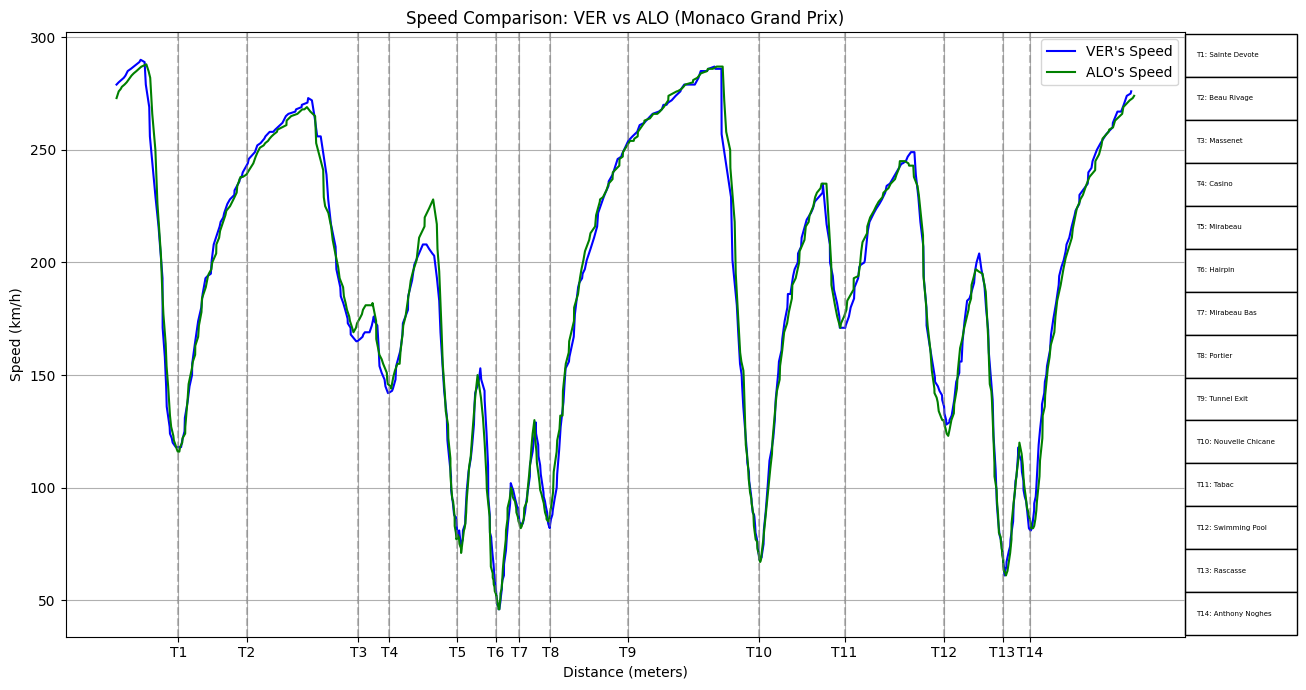

In [11]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label=f"{driver_1}'s Speed", color='blue')
ax.plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label=f"{driver_2}'s Speed", color='green')

corner_positions = [distance for distance, _ in corner_distances]
ax.set_xticks(corner_positions)
ax.set_xticklabels(corner_labels)

for distance in corner_positions:
    ax.axvline(distance, color='gray', linestyle='--', alpha=0.5)

ax.set_title(f"Speed Comparison: {driver_1} vs {driver_2} ({session.event['EventName']})")
ax.set_xlabel("Distance (meters)")
ax.set_ylabel("Speed (km/h)")
ax.legend()
ax.grid()

table_data = [[name] for name in corner_names]
table = plt.table(cellText=table_data, loc='right', cellLoc='left', colLoc='center')
table.scale(0.1, 2.3)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig("speed_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

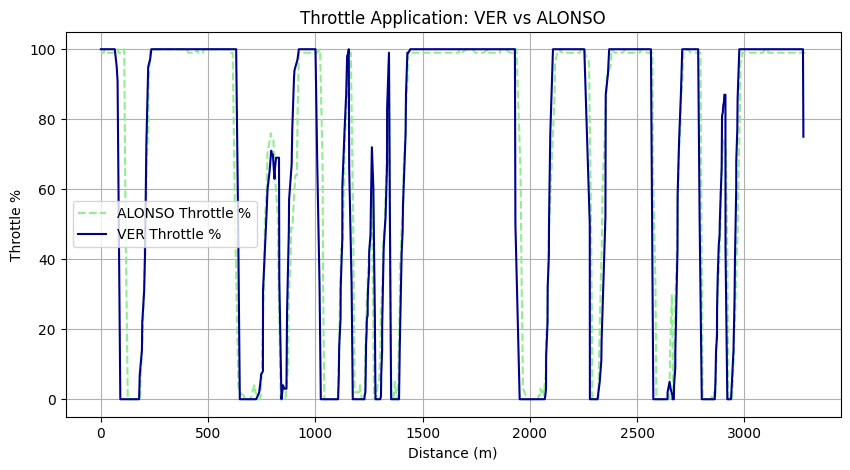

In [23]:
plt.figure(figsize=(10, 5))

plt.plot(telemetry_driver2['Distance'], telemetry_driver2['Throttle'], color='lightgreen', linestyle='--', label="ALONSO Throttle %")
plt.plot(telemetry_driver1['Distance'], telemetry_driver1['Throttle'], color='darkblue', label="VER Throttle %")

plt.xlabel("Distance (m)")
plt.ylabel("Throttle %")
plt.title("Throttle Application: VER vs ALONSO")
plt.legend()
plt.grid(True)

plt.savefig("throttle_comparison.png", dpi=300, bbox_inches="tight")
plt.show()